### Gaussian Process

(a)     
Read the training and test csv datasets

In [4]:
from numpy import genfromtxt
import numpy as np
X_Train = genfromtxt('X_train.csv', delimiter=',')
Y_Train = genfromtxt('Y_train.csv', delimiter=',')
X_Test = genfromtxt('X_test.csv', delimiter=',')
Y_Test = genfromtxt('Y_test.csv', delimiter=',')

Defining Kernel Function

In [5]:
def kernel(x1, x2, b):
    return np.exp( (-1 / b) * (np.linalg.norm(x1-x2,2)**2))

#     return np.exp( (-1 / b) * np.sum( (x1 - x2)**2 ))


Training the data set

In [6]:
from numpy.linalg import inv
mean=[]
var=[]
def gaussian(b,sig):    
    K2=np.zeros(shape=(len(X_Train),len(X_Train)))
    for i in range(len(X_Train)):
        for j in range(len(X_Train)):
            K2[i][j]=(kernel(X_Train[i],X_Train[j],b))
           
    K1=np.zeros(shape=(len(X_Test),len(X_Train)))
    for i in range(len(X_Test)):
        for j in range(len(X_Train)):
            K1[i][j]=kernel(X_Test[i],X_Train[j],b)
#     K1=kernel(X_Test[i],X_Train,1)
#     K3=kernel(X_Test[i],X_Test[i],1)
#     mean=K1*K2_inv*Y_Train[i]
    mu=np.dot(np.dot(K1,np.linalg.inv(np.add(sig*np.eye(350),K2))),Y_Train)
    return mu
# mu=np.dot(np.dot(K1*np.linalg.inv(1+K2_inv)),Y_Train)
# #     mean=K2_inv.dot(K1.T).T.dot(Y_Train[i])
#     var=1+K3-(K1*K2_inv*np.transpose(K3))
# #     var=1+K3-K1.dot(K2_inv.dot(K1.T))
# print(mean.shape)
# print(var.shape)
#     mu.shape
#     print(mu)
# print(X_Test[0].shape)
# print(X_Train[0].shape)

In [7]:
b=[5,7,9,11,13,15]
# a=['b=5','b=7','b=9','b=11','b=13','b=15']
# c=['sig=.1','.2','sig=.3','sig=.4','sig=.5','sig=.6','sig=.7','sig=.8','sig=.9','sig=1']
sig=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
rmse=[]
import pandas as pd
df=pd.DataFrame(index=b, columns=sig)
for i in range(len(b)):
    for j in range(len(sig)):
#         print(b[i])
#         print(sig[j])
        y=gaussian(b[i],sig[j])
        print(i)
        val=(Y_Test-y)*(Y_Test-y)
        val2=np.sqrt(sum(val)/42.0)
#         rmse.append(val2)
        df.ix[b[i], sig[j]] = val2
# rmse

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5


##### (b)  RMSE on 42 Test Points for for 60 total pairs (b,σ2) , b ∈ {5,7,9,11,13,15} and σ2 ∈ {.1,.2,.3,.4,.5,.6,.7,.8,.9,1}

In [8]:
df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
5,1.96628,1.93314,1.92342,1.9222,1.92477,1.92921,1.93463,1.94058,1.94682,1.95321
7,1.92016,1.90488,1.90808,1.9159,1.9248,1.9337,1.94225,1.95038,1.95809,1.96544
9,1.89765,1.90252,1.91765,1.93251,1.9457,1.95723,1.9674,1.97649,1.98474,1.99234
11,1.89051,1.91498,1.93885,1.95794,1.97322,1.98576,1.99638,2.0056,2.01384,2.02134
13,1.89585,1.93559,1.9646,1.9855,2.00131,2.01388,2.02431,2.03331,2.04132,2.04864
15,1.9096,1.95955,1.9908,2.01192,2.02737,2.03947,2.04946,2.0581,2.06585,2.07298


(d)

In [9]:
mu_te=[] 
Xtr=X_Train[:,3]
Xte=X_Test[:,3]
K2n=np.zeros(shape=(len(Xtr),len(Xtr)))
for i in range(len(Xtr)):
    for j in range(len(Xtr)):
        K2n[i][j]=np.exp( (-1 / 5) * (np.linalg.norm(Xtr[i]-Xtr[j])**2))
#         K2n[i][j]=(kernel(Xtr[i],Xtr[j],5))
           
K1n=np.zeros(shape=(len(Xte),len(Xtr)))
for i in range(len(Xte)):
    for j in range(len(Xtr)):
        K1n[i][j]=np.exp( (-1 / 5) * (np.linalg.norm(Xte[i]-Xtr[j])**2))
mu_te=np.dot(np.dot(K1n,np.linalg.inv(np.add(2*np.eye(350),K2n))),Y_Train)

In [10]:
mu_tr=[]
K1nt=np.zeros(shape=(len(Xtr),len(Xtr)))
for i in range(len(Xtr)):
    for j in range(len(Xtr)):
        K1nt[i][j]=np.exp( (-1 / 5) * (np.linalg.norm(Xtr[i]-Xtr[j])**2))
mu_tr=np.dot(np.dot(K1nt,np.linalg.inv(np.add(2*np.eye(350),K2n))),Y_Train)

In [11]:
import itertools
Xtr1, Y_Train1 = zip(*sorted(zip(Xtr, Y_Train)))
Xtr1, mu_tr1 = zip(*sorted(zip(Xtr, mu_tr)))

##### Scatter plot of the data (x[4] versus y for each point). Solid line:  the predictive mean of the Gaussian process at each point in the training set. 


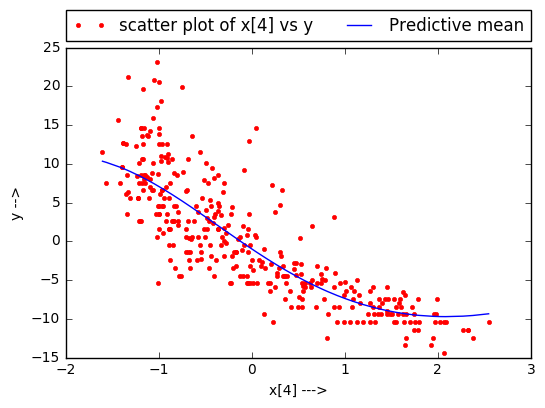

In [12]:
import matplotlib.pyplot as plt
plt.plot(Xtr1, Y_Train1,'.',color='r',label="scatter plot of x[4] vs y")
plt.plot(Xtr1, mu_tr1,label="Predictive mean")
plt.xlabel("x[4] --->")
plt.ylabel("y -->")
# plt.title("Training set")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()